# **K Means Clustering**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

sns.color_palette("Set2")
%matplotlib inline

# Create dataset

In [ ]:
X, Y = make_blobs(n_samples=500, random_state=0, centers=3, n_features=2, cluster_std=0.9)

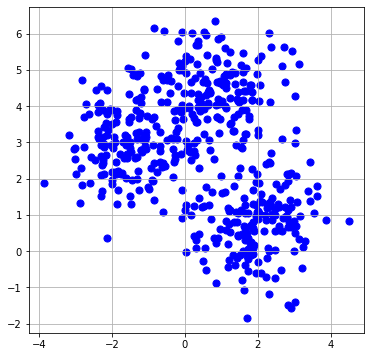

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)   
plt.grid()
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue');

# Clustering using KMeans

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [ ]:
km_pred = kmeans.predict(X)

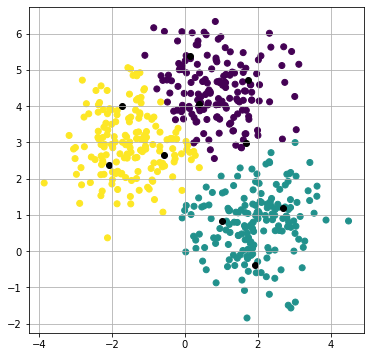

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=km_pred, cmap='viridis')
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] = (6,6)
plt.grid()
# display centroid in black
plt.scatter(centers[:, 0], centers[:, 1], c='black');

# Elbow Method

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


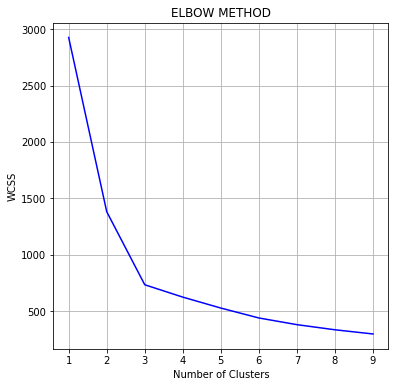

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 10), elbow,color='blue')
plt.rcParams["figure.figsize"] = (6,4)   
plt.title('ELBOW METHOD')
plt.ylabel('WCSS'), plt.xlabel('Number of Clusters')
plt.grid()
plt.show()

# Silhouette Coefficient Method

For n_clusters=2, Silhouette Coefficient = 0.48840052188738403
For n_clusters=3, Silhouette Coefficient = 0.5108779171924057
For n_clusters=4, Silhouette Coefficient = 0.42929491659475466
For n_clusters=5, Silhouette Coefficient = 0.34897024917692976
For n_clusters=6, Silhouette Coefficient = 0.3560022706395938
For n_clusters=7, Silhouette Coefficient = 0.3401452166914081
For n_clusters=8, Silhouette Coefficient = 0.3496823313622429
For n_clusters=9, Silhouette Coefficient = 0.34479746147368406
For n_clusters=10, Silhouette Coefficient = 0.3565704303094243


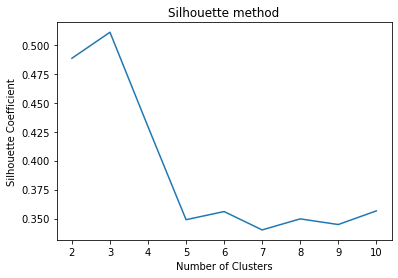

Optimum Number of Clusters: 3


In [ ]:
from sklearn.metrics import silhouette_score

k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)

plt.rcParams["figure.figsize"] = (6, 4)    
plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('Number of Clusters')
plt.title ('Silhouette method')
plt.show()


sil_best = max(sil_coeffecients)
k_best_index = sil_coeffecients.index(sil_best)
k_best = k_clusters[k_best_index]
print("Optimum Number of Clusters:", k_best)

# Gap Calculation

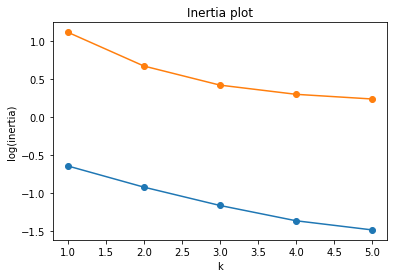

In [ ]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 5
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), X, k_max)


plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')
plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.title ('Inertia plot')
plt.show()

Text(0.5, 1.0, 'Gap statistic')

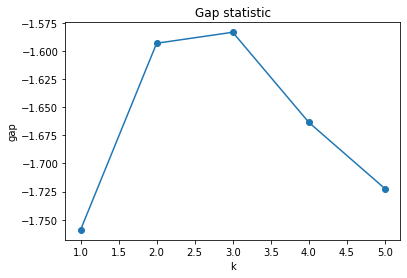

In [ ]:
plt.rcParams["figure.figsize"] = (6, 4)    
plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')
plt.title ('Gap statistic')